In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [2]:
df = pd.read_csv('customer_clustering_data.csv')
df.head()

,Annual Income (k$),Spending Score (1-100)
0,6.454695,7.268467
1,5.766484,6.431171
2,5.477369,2.087178
3,3.198239,7.739520
4,2.898585,6.759572


<function matplotlib.pyplot.show(close=None, block=None)>

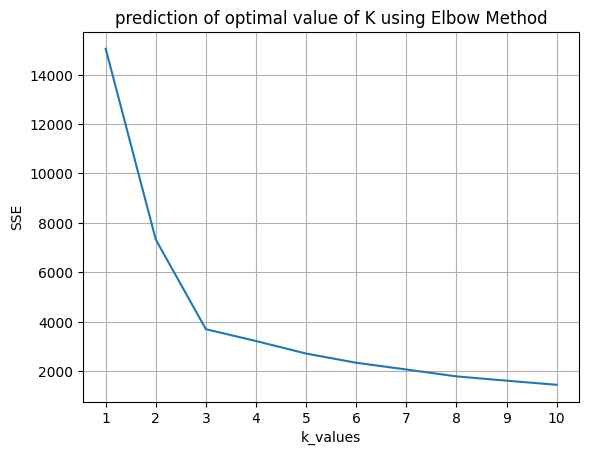

In [13]:
#extract the features 
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

#using the elbow technique we need to determine the value of K
SSE = []
k_values = range(1,11)

for k in k_values :
    kmeans = KMeans(n_clusters=k , random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

#We need to plot the given elbow diagram
plt.plot(k_values, SSE )
plt.title("prediction of optimal value of K using Elbow Method")
plt.xlabel('k_values')
plt.ylabel('SSE')
plt.xticks(k_values)
plt.grid()
plt.show 
    
    
    

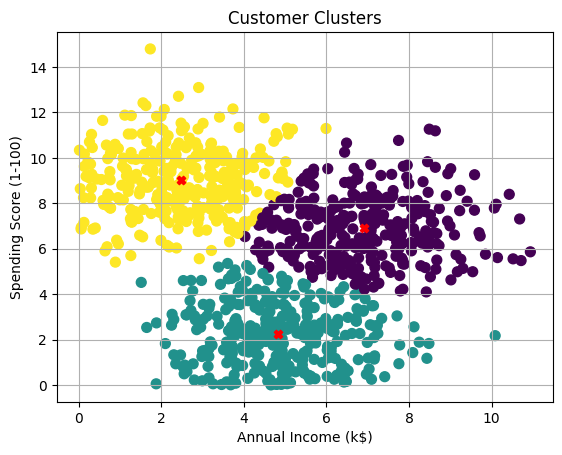

In [35]:
#So from the above Elbow method we got the optimal value of K for KMeans Algorithm is 3

optimal_k= 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

#Predict Cluster Labels
df['Cluster']=kmeans.labels_
df.head()

#Plot the Scatter Plot 
plt.scatter( df['Annual Income (k$)'], df['Spending Score (1-100)'],c=df['Cluster'] ,cmap='viridis', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.title('Customer Clusters')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X')  # Mark centroids
plt.grid()
plt.show()
